# 第5部　統計的推定

## 2章　母集団からの標本抽出シミュレーション

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：5尾の魚しかいない湖からの標本抽出

In [3]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [4]:
# 母集団からのランダムサンプリング

# 乱数の種
np.random.seed(1)

# 標本抽出
sample_1 = np.random.choice(fish_5, size=3, 
                            replace=False)
sample_1

array([4, 3, 6])

In [5]:
# 標本平均を計算
round(np.mean(sample_1), 3)

4.333

### 実装：もっとたくさんの魚がいる湖からの標本抽出

#### データの読み込み

In [6]:
# たくさんの魚がいる母集団

# データ読み込み
fish_100000 = pd.read_csv(
    '5-2-1-fish_length_100000.csv')['length']

# 先頭行の取得
fish_100000.head(3)

0    5.297442
1    3.505566
2    3.572546
Name: length, dtype: float64

In [7]:
# 母集団の大きさ
len(fish_100000)

100000

#### 標本抽出

In [8]:
# 母集団からのランダムサンプリング

# 乱数の種
np.random.seed(2)

# 標本抽出
sample_2 = np.random.choice(fish_100000, size=500, 
                            replace=False)

In [9]:
# 標本平均
round(np.mean(sample_2), 3)

3.962

<AxesSubplot:ylabel='Count'>

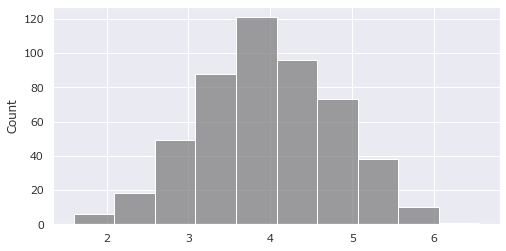

In [10]:
# 標本のヒストグラム
sns.histplot(sample_2, color='gray', bins=10)

### 実装：母集団分布の可視化

In [11]:
# 母集団の平均・分散・標準偏差
print('平均　　：', round(np.mean(fish_100000), 3))
print('分散　　：', round(np.var(fish_100000, ddof=0), 3))
print('標準偏差：', round(np.std(fish_100000, ddof=0), 3))

平均　　： 4.0
分散　　： 0.64
標準偏差： 0.8


<AxesSubplot:xlabel='length', ylabel='Count'>

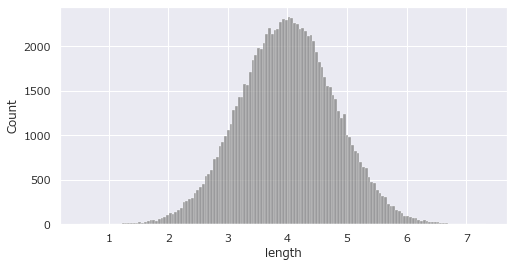

In [12]:
# 母集団分布のヒストグラム
sns.histplot(fish_100000, color='gray')

### 実装：母集団分布と正規分布の確率密度関数の比較

In [13]:
# 正規分布の累積分布関数(平均4、分散0.64)
# 確率変数が0から8をとる確率密度を各々計算

# 確率変数
x = np.arange(start=0, stop=8.1, step=0.1)
# 確率密度
density = stats.norm.pdf(x=x, loc=4, scale=0.8)

# データフレームにまとめる
density_df = pd.DataFrame({
    'x': x,
    'density': density
})

# 先頭行の取得
print(density_df.head(3))

     x   density
0  0.0  0.000002
1  0.1  0.000003
2  0.2  0.000006


<AxesSubplot:xlabel='length', ylabel='Density'>

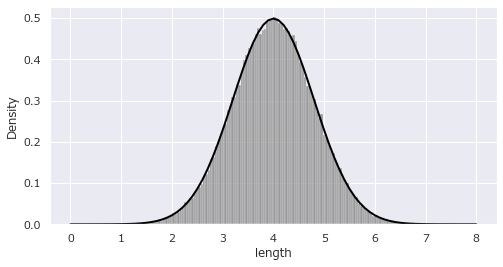

In [14]:
# ヒストグラムに確率密度を重ね合わせる

# 母集団分布のヒストグラム
sns.histplot(fish_100000, 
             stat='density', color='gray')
# 折れ線グラフ（正規分布の確率密度関数）
sns.lineplot(x=x, y=density, 
             data=density_df, color='black', linewidth=2.0)

### 実装：データが得られるプロセスの抽象化

In [15]:
# 乱数の種
np.random.seed(1)

# 正規分布に従う乱数の生成
sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sampling_norm

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 ,
       4.6923261 , 2.15876904, 5.39584941, 3.39103448,
       4.25523128, 3.8005037 ])

In [16]:
# 標本平均
round(np.mean(sampling_norm), 3)

3.922